In [1]:
#momentum strategy Stellantis

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf

In [3]:
ticker = 'STLAM.MI'
stock = yf.Ticker(ticker)
hist_data = stock.history(period='10y')

In [4]:
hist_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-04-09 00:00:00+02:00,3.373645,3.450757,3.360151,3.417984,24078695,0.0,0.0
2014-04-10 00:00:00+02:00,3.448829,3.462324,3.375573,3.381356,26456575,0.0,0.0
2014-04-11 00:00:00+02:00,3.358223,3.416057,3.317739,3.373645,23053624,0.0,0.0
2014-04-14 00:00:00+02:00,3.352439,3.389067,3.317739,3.354367,20483427,0.0,0.0
2014-04-15 00:00:00+02:00,3.352439,3.360150,3.202071,3.203999,26973663,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-03 00:00:00+02:00,25.480000,25.485001,24.625000,25.014999,14198715,0.0,0.0
2024-04-04 00:00:00+02:00,25.059999,25.400000,24.860001,25.049999,7012430,0.0,0.0
2024-04-05 00:00:00+02:00,24.500000,24.719999,24.344999,24.600000,9693283,0.0,0.0


In [5]:
STLN=pd.DataFrame(hist_data['Close'])

In [6]:
STLN.rename(columns={'Close':'Price'}, inplace=True)

In [7]:
STLN

,Price
Date,
2014-04-09 00:00:00+02:00,3.417984
2014-04-10 00:00:00+02:00,3.381356
2014-04-11 00:00:00+02:00,3.373645
2014-04-14 00:00:00+02:00,3.354367
2014-04-15 00:00:00+02:00,3.203999
...,...
2024-04-03 00:00:00+02:00,25.014999
2024-04-04 00:00:00+02:00,25.049999
2024-04-05 00:00:00+02:00,24.600000


In [8]:
STLN['returns'] = np.log(STLN['Price'] / STLN['Price'].shift(1))

In [9]:
#Defines a new column with the sign (that is, 1 or –1) of the relevant log return;
#values represent the market positionings (long or short).

In [10]:
STLN['position'] = np.sign(STLN['returns'])
STLN

,Price,returns,position
Date,,,
2014-04-09 00:00:00+02:00,3.417984,NaN,NaN
2014-04-10 00:00:00+02:00,3.381356,-0.010774,-1.0
2014-04-11 00:00:00+02:00,3.373645,-0.002283,-1.0
2014-04-14 00:00:00+02:00,3.354367,-0.005731,-1.0
2014-04-15 00:00:00+02:00,3.203999,-0.045864,-1.0
...,...,...,...
2024-04-03 00:00:00+02:00,25.014999,-0.018418,-1.0
2024-04-04 00:00:00+02:00,25.049999,0.001398,1.0
2024-04-05 00:00:00+02:00,24.600000,-0.018127,-1.0


In [11]:
#strategy log returns given the market positionings.

In [12]:
STLN['strategy'] = STLN['position'].shift(1) * STLN['returns']

In [13]:
STLN

,Price,returns,position,strategy
Date,,,,
2014-04-09 00:00:00+02:00,3.417984,NaN,NaN,NaN
2014-04-10 00:00:00+02:00,3.381356,-0.010774,-1.0,NaN
2014-04-11 00:00:00+02:00,3.373645,-0.002283,-1.0,0.002283
2014-04-14 00:00:00+02:00,3.354367,-0.005731,-1.0,0.005731
2014-04-15 00:00:00+02:00,3.203999,-0.045864,-1.0,0.045864
...,...,...,...,...
2024-04-03 00:00:00+02:00,25.014999,-0.018418,-1.0,0.018418
2024-04-04 00:00:00+02:00,25.049999,0.001398,1.0,-0.001398
2024-04-05 00:00:00+02:00,24.600000,-0.018127,-1.0,-0.018127


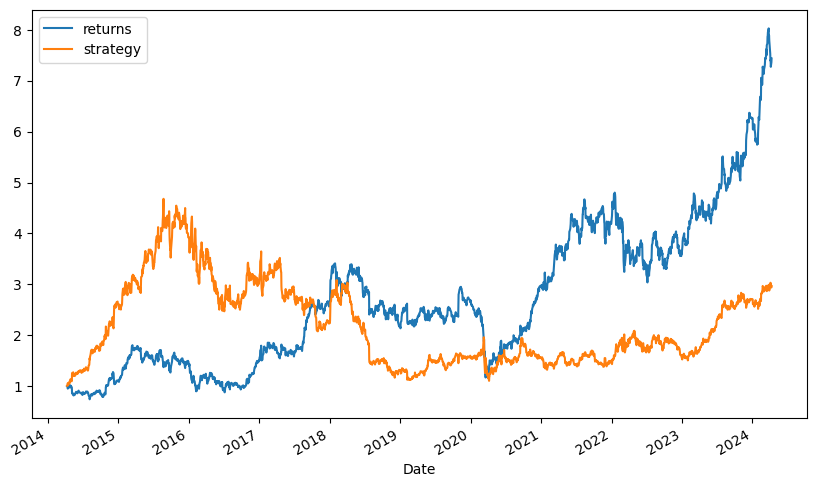

In [14]:
STLN[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6));

In [15]:
#Using a rolling time window

In [16]:
STLN['position'] = np.sign(STLN['returns'].rolling(3).mean())

In [17]:
STLN['strategy'] = STLN['position'].shift(1) * STLN['returns']

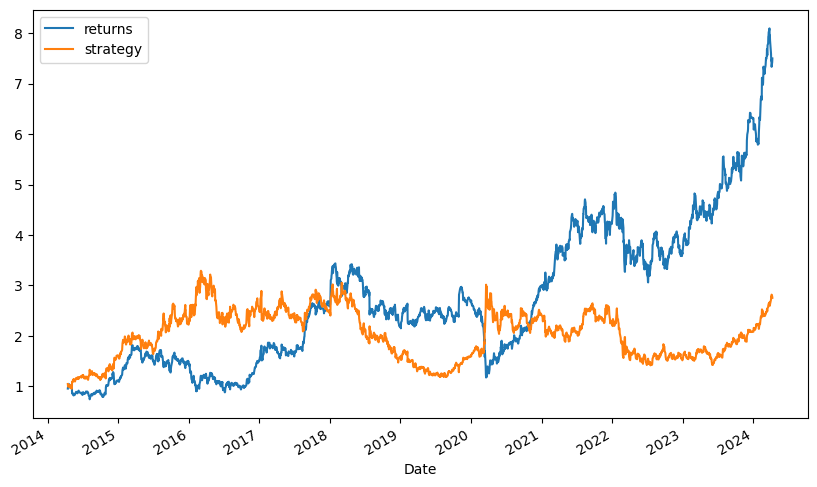

In [18]:
STLN[['returns', 'strategy']].dropna().cumsum(
                 ).apply(np.exp).plot(figsize=(10, 6));


In [19]:
STLN['returns'] = np.log(STLN['Price'] / STLN['Price'].shift(1))

In [20]:
STLN['strategy'] = STLN['position'].shift(1) * STLN['returns']

In [21]:
STLN[['returns', 'strategy']].sum()

returns     1.996006
strategy    1.013691
dtype: float64

In [22]:
STLN['returns'] = np.log(STLN['Price'] / STLN['Price'].shift(1))


In [23]:
to_plot = ['returns']


In [24]:
for m in [1, 3, 5, 7, 9]:
            STLN['position_%d' % m] = np.sign(STLN['returns'].rolling(m).mean()) 
            STLN['strategy_%d' % m] = (STLN['position_%d' % m].shift(1) * STLN['returns'])
            to_plot.append('strategy_%d' % m)


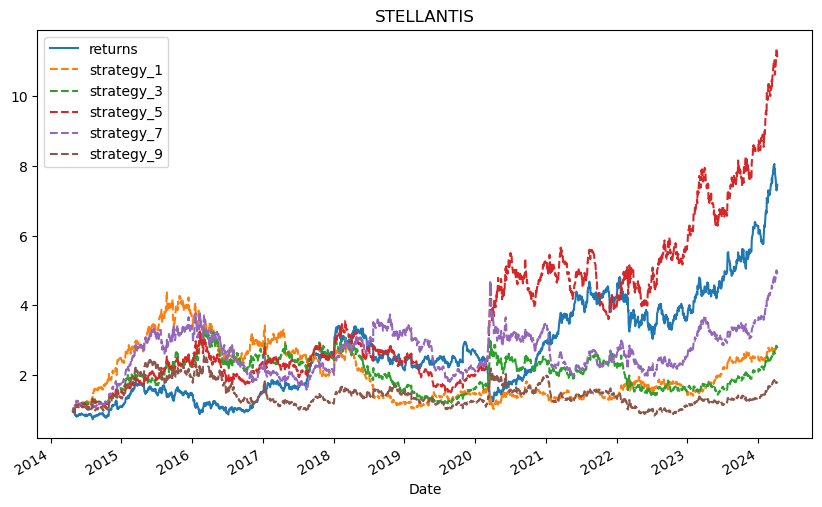

In [25]:
STLN[to_plot].dropna().cumsum().apply(np.exp).plot(
    title='STELLANTIS',
    figsize=(10, 6), style=['-', '--', '--', '--', '--', '--']);

In [26]:
STLN['position'] = np.sign(STLN['returns'].rolling(5).mean())

In [27]:
STLN['strategy'] = STLN['position'].shift(1) * STLN['returns']

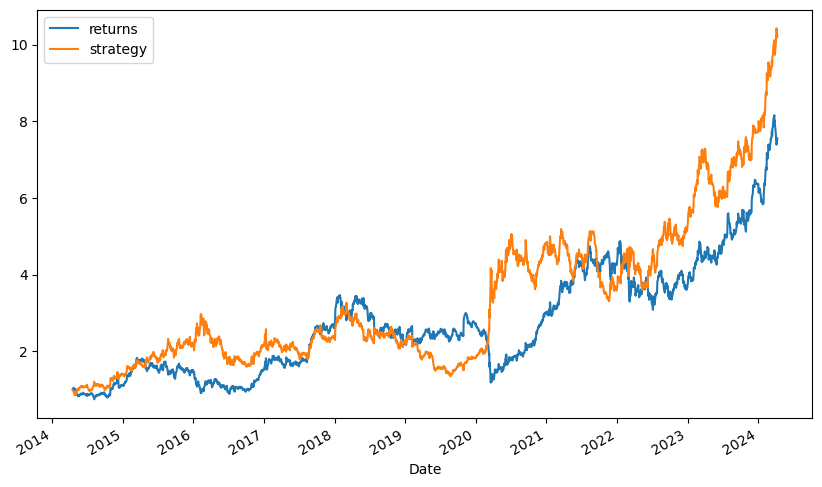

In [28]:
STLN[['returns', 'strategy']].dropna().cumsum(
                 ).apply(np.exp).plot(figsize=(10, 6));


In [29]:
STLN[['returns', 'strategy']].sum()

returns     1.996006
strategy    2.321951
dtype: float64

In [30]:
#Gross performance of Stellantis compared to the MOM-based strategy

In [31]:
mean_logrets=np.exp(STLN[['returns', 'strategy']].mean() * 252) - 1
mean_logrets

returns     0.218903
strategy    0.259519
dtype: float64

In [32]:
std_logrets=(STLN[['returns', 'strategy']].apply(np.exp) - 1).std() * 252 ** 0.5
std_logrets

returns     0.380722
strategy    0.385584
dtype: float64

In [33]:
#new column defining the gross performance over time.

In [37]:
STLN['cumret'] = STLN['strategy'].cumsum().apply(np.exp)

In [38]:
#maximum value of the grossperformance.

In [39]:
STLN['cummax'] = STLN['cumret'].cummax()

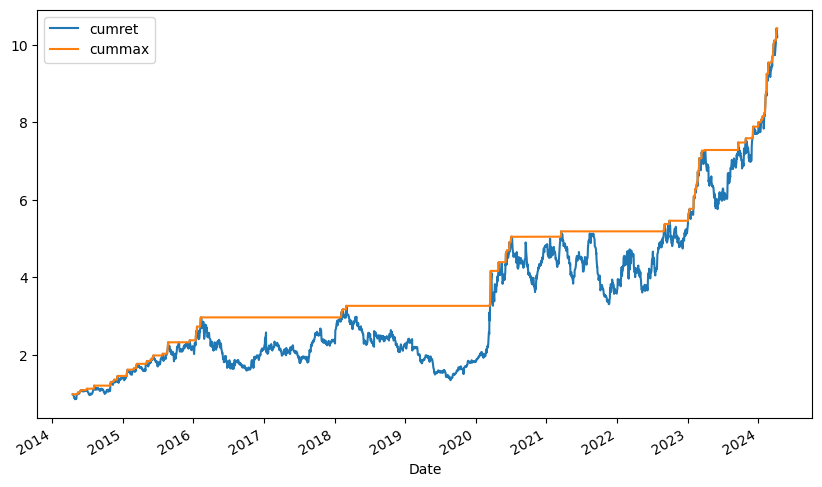

In [40]:
STLN[['cumret', 'cummax']].dropna().plot(figsize=(10, 6));

In [41]:
# Gross performance and cumulative maximum performance of the MOM- based strategy

In [42]:
drawdown = STLN['cummax'] - STLN['cumret']
drawdown.max()

1.9184294579284877